In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load dataset

In [ ]:
# read json dataset
df = pd.read_json("/content/drive/MyDrive/Final_Project/transactions.json", lines =True)

# display all unseen field int the table
pd.set_option('display.max_columns', None) # to display all the fields in the table

# 1. understanding the data

In [ ]:
df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,01,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,0.00,,,,False,,,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,01,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,111.33,,,,False,,,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,01,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,136.08,,,,False,,,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,01,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,323.48,,,,False,,,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,01,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,,550.82,,,,False,,,False
5,733493772,733493772,5000,4449.18,2016-01-16T21:35:27,9.80,Fresh eCards,US,US,05,01,online_gifts,02/2021,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,550.82,,,,False,,,False
6,733493772,733493772,5000,4439.38,2016-01-24T07:54:01,247.99,Uber,,US,05,01,rideshare,01/2026,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,560.62,,,,False,,,False
7,733493772,733493772,5000,4191.39,2016-01-26T05:28:24,0.00,Universe Massage #95463,US,US,05,01,personal care,12/2031,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,,808.61,,,,False,,,False
8,733493772,733493772,5000,4191.39,2016-01-26T12:18:14,11.54,Universe Massage #70014,US,US,05,01,personal care,04/2024,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,808.61,,,,True,,,False
9,733493772,733493772,5000,4179.85,2016-01-26T12:19:15,11.54,Universe Massage #70014,US,US,05,01,personal care,04/2024,2014-08-03,2014-08-03,492,492,9184,REVERSAL,False,,820.15,,,,True,,,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                641914 non-null  object 
 8   merchantCountryCode       641914 non-null  object 
 9   posEntryMode              641914 non-null  object 
 10  posConditionCode          641914 non-null  object 
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [ ]:
# get a descriptive statistics summary
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,6.419140e+05,6.419140e+05,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000
mean,5.547701e+08,5.547701e+08,10697.210608,6652.828573,135.162497,557.199927,556.775160,4886.184043,4044.382035
std,2.546884e+08,2.546884e+08,11460.359133,9227.132275,147.053302,257.326204,257.402639,2859.053679,5945.510224
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,100.000000,1.000000,0.000000,0.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1114.970000,32.320000,334.000000,333.000000,2364.000000,502.442500
50%,5.438879e+08,5.438879e+08,7500.000000,3578.165000,85.800000,581.000000,580.000000,4873.000000,2151.860000
75%,7.862277e+08,7.862277e+08,15000.000000,8169.185000,189.030000,762.000000,761.000000,7267.000000,5005.890000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,998.000000,998.000000,9998.000000,47496.500000


In [ ]:
# show total rows and columns from our dataset
df.shape

(641914, 29)

In [ ]:
# show columns from our dataset
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'isFraud', 'echoBuffer', 'currentBalance',
       'merchantCity', 'merchantState', 'merchantZip', 'cardPresent',
       'posOnPremises', 'recurringAuthInd', 'expirationDateKeyInMatch'],
      dtype='object')

In [ ]:
# show unique data
df.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              450690
transactionDateTime         635472
transactionAmount            62735
merchantName                  2493
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1826
dateOfLastAddressChange       2186
cardCVV                        899
enteredCVV                     980
cardLast4Digits               5134
transactionType                  4
isFraud                          2
echoBuffer                       1
currentBalance              406990
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInM

# 2. Data Preprocessing

In [ ]:
# fill empty cell with NaN
for i in df:
    df[i] = df[i].replace("", np.nan)

In [ ]:
# show total missing values
df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    3913
merchantCountryCode            624
posEntryMode                  3345
posConditionCode               287
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                589
isFraud                          0
echoBuffer                  641914
currentBalance                   0
merchantCity                641914
merchantState               641914
merchantZip                 641914
cardPresent                      0
posOnPremises               641914
recurringAuthInd            641914
expirationDateKeyInM

In [ ]:
# show missing values on percent
df_missing = df.isnull().sum().sort_values(ascending = False)
missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)

missing_percent = pd.concat([df_missing, missing_percent], axis=1, keys=["total missing","missing percent"])
missing_percent.head(10)

,total missing,missing percent
recurringAuthInd,641914,1.000000
posOnPremises,641914,1.000000
merchantZip,641914,1.000000
merchantState,641914,1.000000
merchantCity,641914,1.000000
echoBuffer,641914,1.000000
acqCountry,3913,0.006096
posEntryMode,3345,0.005211
merchantCountryCode,624,0.000972
transactionType,589,0.000918


In [ ]:
df = df.drop(columns=["customerId","accountNumber","echoBuffer", "merchantCity", "merchantState", "merchantZip", "posOnPremises", "recurringAuthInd", "cardLast4Digits"], axis = 1)

In [ ]:
#get the list of all object columns
df_object = list(df.select_dtypes('object').columns)

#looping through if each column to fillna
for i in df_object:
    df[i].fillna(df[i].mode().iloc[0],inplace=True)

In [ ]:
df['isFraud'] = df['isFraud'].astype(int)
df['cardPresent'] = df['cardPresent'].astype(int)
df['expirationDateKeyInMatch'] = df['expirationDateKeyInMatch'].astype(int)

In [ ]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])

In [ ]:
# change dtype, object to int
df['posEntryMode'] = df['posEntryMode'].astype(int)
df['posConditionCode'] = df['posConditionCode'].astype(int)

In [ ]:
df.dtypes

creditLimit                          int64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                         int64
posConditionCode                     int64
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
cardCVV                              int64
enteredCVV                           int64
transactionType                     object
isFraud                              int64
currentBalance                     float64
cardPresent                          int64
expirationDateKeyInMatch             int64
dtype: object

In [ ]:
df.head(5)

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,5,1,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,PURCHASE,1,0.00,0,0
1,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,9,1,rideshare,2023-06-01,2014-08-03,2014-08-03,492,492,PURCHASE,0,111.33,0,0
2,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,5,1,rideshare,2027-12-01,2014-08-03,2014-08-03,492,492,PURCHASE,0,136.08,0,0
3,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,2,1,rideshare,2029-09-01,2014-08-03,2014-08-03,492,492,PURCHASE,1,323.48,0,0
4,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,2,1,rideshare,2024-10-01,2014-08-03,2014-08-03,492,492,ADDRESS_VERIFICATION,0,550.82,0,0


In [ ]:
df2 = df.copy()

In [ ]:
df2["transaction_month"] = pd.to_datetime(df2["transactionDateTime"]).dt.month
df2["account_open_month"] = pd.to_datetime(df2["accountOpenDate"]).dt.month
df2["monthOfLastAddressChange"] = pd.to_datetime(df2["dateOfLastAddressChange"]).dt.month
df2["currentExpMonth"] = pd.to_datetime(df2["currentExpDate"]).dt.month
df2["currentExpYear"] = pd.to_datetime(df2["currentExpDate"]).dt.year

In [ ]:
df2.loc[df2['cardCVV'] == df2["enteredCVV"], 'isCVV_match'] = 'Yes' 
df2.loc[df2['cardCVV'] != df2["enteredCVV"], 'isCVV_match'] = 'No'

In [ ]:
df2.head()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transaction_month,account_open_month,monthOfLastAddressChange,currentExpMonth,currentExpYear,isCVV_match
0,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,5,1,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,PURCHASE,1,0.00,0,0,1,8,8,4,2020,Yes
1,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,9,1,rideshare,2023-06-01,2014-08-03,2014-08-03,492,492,PURCHASE,0,111.33,0,0,1,8,8,6,2023,Yes
2,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,5,1,rideshare,2027-12-01,2014-08-03,2014-08-03,492,492,PURCHASE,0,136.08,0,0,1,8,8,12,2027,Yes
3,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,2,1,rideshare,2029-09-01,2014-08-03,2014-08-03,492,492,PURCHASE,1,323.48,0,0,1,8,8,9,2029,Yes
4,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,2,1,rideshare,2024-10-01,2014-08-03,2014-08-03,492,492,ADDRESS_VERIFICATION,0,550.82,0,0,1,8,8,10,2024,Yes


In [ ]:
df2['merchantName_temp'] = df2['merchantName'].replace(r'#', r'', regex=True)
df2['merchantName_fix'] = df2['merchantName_temp'].replace('\d+', '', regex=True)

In [ ]:
df2 = df2.drop(columns=["cardCVV", "enteredCVV", "transactionDateTime", "accountOpenDate", "dateOfLastAddressChange", "merchantName", "merchantName_temp", "currentExpDate"], axis = 1)

In [ ]:
# df2 = df2.drop(columns=["cardCVV", "enteredCVV", "transactionDateTime", "accountOpenDate", "dateOfLastAddressChange", "currentExpDate"], axis = 1)

In [ ]:
df2.head(10)

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transaction_month,account_open_month,monthOfLastAddressChange,currentExpMonth,currentExpYear,isCVV_match,merchantName_fix
0,5000,5000.00,111.33,US,US,5,1,rideshare,PURCHASE,1,0.00,0,0,1,8,8,4,2020,Yes,Lyft
1,5000,4888.67,24.75,US,US,9,1,rideshare,PURCHASE,0,111.33,0,0,1,8,8,6,2023,Yes,Uber
2,5000,4863.92,187.40,US,US,5,1,rideshare,PURCHASE,0,136.08,0,0,1,8,8,12,2027,Yes,Lyft
3,5000,4676.52,227.34,US,US,2,1,rideshare,PURCHASE,1,323.48,0,0,1,8,8,9,2029,Yes,Lyft
4,5000,4449.18,0.00,US,US,2,1,rideshare,ADDRESS_VERIFICATION,0,550.82,0,0,1,8,8,10,2024,Yes,Lyft
5,5000,4449.18,9.80,US,US,5,1,online_gifts,PURCHASE,0,550.82,0,0,1,8,8,2,2021,Yes,Fresh eCards
6,5000,4439.38,247.99,US,US,5,1,rideshare,PURCHASE,0,560.62,0,0,1,8,8,1,2026,Yes,Uber
7,5000,4191.39,0.00,US,US,5,1,personal care,ADDRESS_VERIFICATION,0,808.61,0,0,1,8,8,12,2031,Yes,Universe Massage
8,5000,4191.39,11.54,US,US,5,1,personal care,PURCHASE,0,808.61,1,0,1,8,8,4,2024,Yes,Universe Massage
9,5000,4179.85,11.54,US,US,5,1,personal care,REVERSAL,0,820.15,1,0,1,8,8,4,2024,Yes,Universe Massage


In [ ]:
df2.dtypes

creditLimit                   int64
availableMoney              float64
transactionAmount           float64
acqCountry                   object
merchantCountryCode          object
posEntryMode                  int64
posConditionCode              int64
merchantCategoryCode         object
transactionType              object
isFraud                       int64
currentBalance              float64
cardPresent                   int64
expirationDateKeyInMatch      int64
transaction_month             int64
account_open_month            int64
monthOfLastAddressChange      int64
currentExpMonth               int64
currentExpYear                int64
isCVV_match                  object
merchantName_fix             object
dtype: object

In [ ]:
df2["isFraud"].value_counts()

0    630612
1     11302
Name: isFraud, dtype: int64

1.   False -> Legitimate
2.   True -> Fraud


conclusion: data unbalance

In [ ]:
# separate the data / balancing data

fraud = df2.loc[df["isFraud"] == 1]
legitimate = df2.loc[df["isFraud"] == 0]

In [ ]:
fraud["transactionAmount"].describe()

count    11302.000000
mean       232.603744
std        189.654934
min          0.000000
25%         91.475000
50%        185.215000
75%        324.817500
max       1743.510000
Name: transactionAmount, dtype: float64

In [ ]:
legitimate["transactionAmount"].describe()

count    630612.000000
mean        133.416128
std         145.583066
min           0.000000
25%          31.810000
50%          84.340000
75%         186.440000
max        1825.250000
Name: transactionAmount, dtype: float64

# 3. Sampling

build a dataset with similiar data between legit and fraud

In [ ]:
print(fraud.shape)
print(legitimate.shape)

(11302, 20)
(630612, 20)


from shape, we found 11302 fraud

In [ ]:
legitimate_sample = legitimate.sample(n=11302) # random sampling

In [ ]:
# combine the dataset
new_df = pd.concat([legitimate_sample, fraud], axis=0)

In [ ]:
new_df.head()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transaction_month,account_open_month,monthOfLastAddressChange,currentExpMonth,currentExpYear,isCVV_match,merchantName_fix
439994,10000,1812.17,140.85,US,US,9,1,online_retail,PURCHASE,0,8187.83,0,0,8,9,4,9,2023,Yes,gap.com
55817,2500,419.09,138.92,US,US,9,1,online_retail,PURCHASE,0,2080.91,0,0,3,5,3,11,2019,Yes,discount.com
101102,10000,7727.34,128.08,US,US,9,1,entertainment,PURCHASE,0,2272.66,1,0,12,6,10,1,2032,Yes,EZ Putt Putt
301357,7500,4547.19,71.59,US,US,5,1,entertainment,PURCHASE,0,2952.81,1,0,6,11,6,8,2023,Yes,EZ Putt Putt
135153,500,25.76,153.06,US,US,5,1,food,PURCHASE,0,474.24,1,0,10,2,2,11,2028,Yes,Franks Pub


In [ ]:
new_df.tail()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transaction_month,account_open_month,monthOfLastAddressChange,currentExpMonth,currentExpYear,isCVV_match,merchantName_fix
641627,7500,5802.15,44.27,US,US,5,1,online_retail,PURCHASE,1,1697.85,0,0,11,1,1,2,2019,Yes,target.com
641792,50000,34545.80,12.71,US,US,5,1,online_gifts,PURCHASE,1,15454.20,0,0,9,2,2,4,2023,Yes,Blue Mountain Online Services
641812,50000,33255.25,695.87,US,US,9,1,online_gifts,PURCHASE,1,16744.75,0,0,10,2,2,8,2024,Yes,Fresh Flowers
641870,7500,6448.10,92.60,US,US,2,1,online_gifts,PURCHASE,1,1051.90,0,0,5,11,11,6,2026,Yes,Blue Mountain Online Services
641874,7500,5756.53,164.48,US,US,2,1,online_gifts,PURCHASE,1,1743.47,0,0,6,11,6,10,2031,Yes,Blue Mountain Online Services


In [ ]:
new_df.dtypes

creditLimit                   int64
availableMoney              float64
transactionAmount           float64
acqCountry                   object
merchantCountryCode          object
posEntryMode                  int64
posConditionCode              int64
merchantCategoryCode         object
transactionType              object
isFraud                       int64
currentBalance              float64
cardPresent                   int64
expirationDateKeyInMatch      int64
transaction_month             int64
account_open_month            int64
monthOfLastAddressChange      int64
currentExpMonth               int64
currentExpYear                int64
isCVV_match                  object
merchantName_fix             object
dtype: object

In [ ]:
new_df["isFraud"].value_counts()

0    11302
1    11302
Name: isFraud, dtype: int64

# 4. Label Encoder

In [ ]:
#get the list of all object columns
new_df.select_dtypes('object').columns

Index(['acqCountry', 'merchantCountryCode', 'merchantCategoryCode',
       'transactionType', 'isCVV_match', 'merchantName_fix'],
      dtype='object')

In [ ]:
le_merchantName_fix = LabelEncoder()
le_acqCountry = LabelEncoder() 
le_merchantCountryCode = LabelEncoder()
le_cardPresent = LabelEncoder()
le_merchantCategoryCode = LabelEncoder()
le_transactionType = LabelEncoder()

In [ ]:
new_df["merchantName_fix"] = le_acqCountry.fit_transform(new_df["merchantName_fix"])
new_df["acqCountry"] = le_acqCountry.fit_transform(new_df["acqCountry"])
new_df["merchantCountryCode"] = le_acqCountry.fit_transform(new_df["merchantCountryCode"])
new_df["merchantCategoryCode"] = le_acqCountry.fit_transform(new_df["merchantCategoryCode"])
new_df["transactionType"] = le_acqCountry.fit_transform(new_df["transactionType"])
new_df["isCVV_match"] = le_acqCountry.fit_transform(new_df["isCVV_match"])

In [ ]:
new_df.head(5)

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transaction_month,account_open_month,monthOfLastAddressChange,currentExpMonth,currentExpYear,isCVV_match,merchantName_fix
439994,10000,1812.17,140.85,3,3,9,1,14,1,0,8187.83,0,0,8,9,4,9,2023,1,180
55817,2500,419.09,138.92,3,3,9,1,14,1,0,2080.91,0,0,3,5,3,11,2019,1,177
101102,10000,7727.34,128.08,3,3,9,1,3,1,0,2272.66,1,0,12,6,10,1,2032,1,48
301357,7500,4547.19,71.59,3,3,5,1,3,1,0,2952.81,1,0,6,11,6,8,2023,1,48
135153,500,25.76,153.06,3,3,5,1,5,1,0,474.24,1,0,10,2,2,11,2028,1,61


# 5. Feature Selection

**Pearson Correlation**

In [ ]:
corr = new_df.corr()["isFraud"].sort_values().reset_index()
corr = corr[~corr["index"].str.contains("isFraud")]
corr

,index,isFraud
0,cardPresent,-5.337994e-02
1,transaction_month,-3.721233e-02
2,isCVV_match,-3.000286e-02
3,merchantCountryCode,-1.901051e-02
4,acqCountry,-1.672176e-02
5,monthOfLastAddressChange,-1.013741e-02
6,availableMoney,-4.453248e-03
7,expirationDateKeyInMatch,-7.638062e-17
8,currentExpYear,6.594822e-03
9,account_open_month,7.587354e-03


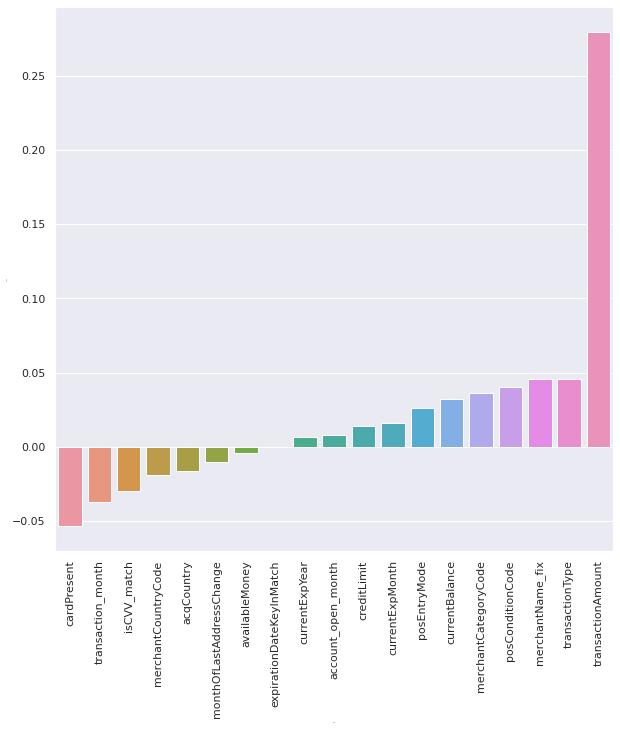

In [ ]:
chart = sns.barplot(data=corr, x="index", y="isFraud")
sns.set( rc = {'figure.figsize' : ( 10, 10 ), 
               'axes.labelsize' : 1 })

for item in chart.get_xticklabels():
  item.set_rotation(90)

# 6. Split the Data for Features and Target

In [ ]:
X = new_df.drop(columns="isFraud", axis=1)
Y = new_df["isFraud"]

In [ ]:
X.head(5)

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,transaction_month,account_open_month,monthOfLastAddressChange,currentExpMonth,currentExpYear,isCVV_match,merchantName_fix
439994,10000,1812.17,140.85,3,3,9,1,14,1,8187.83,0,0,8,9,4,9,2023,1,180
55817,2500,419.09,138.92,3,3,9,1,14,1,2080.91,0,0,3,5,3,11,2019,1,177
101102,10000,7727.34,128.08,3,3,9,1,3,1,2272.66,1,0,12,6,10,1,2032,1,48
301357,7500,4547.19,71.59,3,3,5,1,3,1,2952.81,1,0,6,11,6,8,2023,1,48
135153,500,25.76,153.06,3,3,5,1,5,1,474.24,1,0,10,2,2,11,2028,1,61


In [ ]:
Y.head(5).reset_index()

,index,isFraud
0,439994,0
1,55817,0
2,101102,0
3,301357,0
4,135153,0


# 7. Split the Data for Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# test size 0.2 mean is 80% goes to training data, and 20% goes to testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(22604, 19) (18083, 19) (4521, 19)


# 8. Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

**Logistic Regression**

In [ ]:
model_lr = LogisticRegression()

In [ ]:
# training the Logistic Regression model with training data
model_lr.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# accuracy on training data
X_train_pred = model_lr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)
print("Accuracy on Training Data: ", training_data_accuracy)

# accuracy on test data
X_test_pred = model_lr.predict(X_test) # lrpred = lr.predict(test_features)
testing_data_accuracy = accuracy_score(X_test_pred, Y_test)
print("Accuracy on Testing Data: ", testing_data_accuracy)

Accuracy on Training Data:  0.6296521594868109
Accuracy on Testing Data:  0.6246405662464056


In [ ]:
print(classification_report(Y_test, X_test_pred)) # print(classification_report(test_target, lrpred))

              precision    recall  f1-score   support

           0       0.60      0.72      0.66      2261
           1       0.65      0.53      0.58      2260

    accuracy                           0.62      4521
   macro avg       0.63      0.62      0.62      4521
weighted avg       0.63      0.62      0.62      4521



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


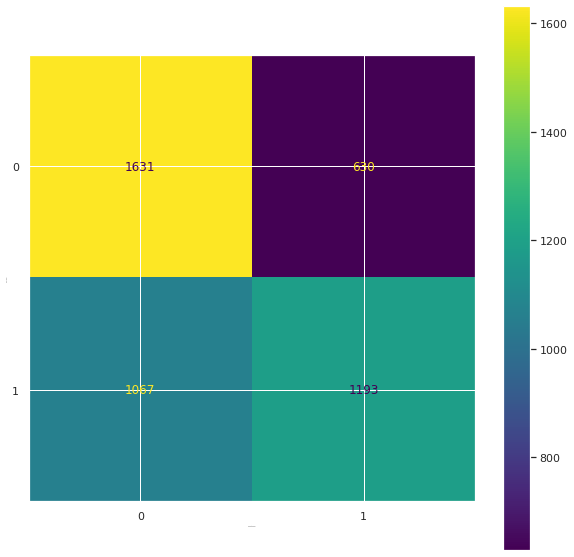

In [ ]:
plot_confusion_matrix(model_lr, X_test, Y_test)

**Random Forest**

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
model_rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# accuracy on training data
X_train_pred = model_rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)
print("Accuracy on Training Data: ", training_data_accuracy)

# accuracy on test data
X_test_pred = model_rf.predict(X_test) 
testing_data_accuracy = accuracy_score(X_test_pred, Y_test)
print("Accuracy on Testing Data: ", testing_data_accuracy)

Accuracy on Training Data:  1.0
Accuracy on Testing Data:  0.6883432868834328


              precision    recall  f1-score   support

           0       0.69      0.68      0.69      2261
           1       0.69      0.70      0.69      2260

    accuracy                           0.69      4521
   macro avg       0.69      0.69      0.69      4521
weighted avg       0.69      0.69      0.69      4521



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


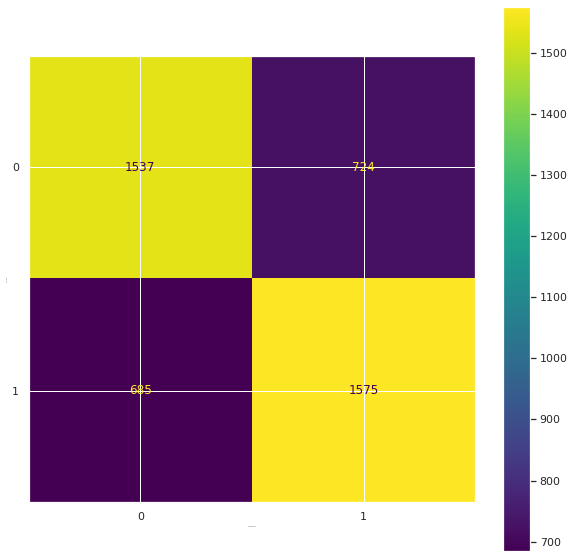

In [ ]:
print(classification_report(Y_test, X_test_pred))
plot_confusion_matrix(model_rf, X_test, Y_test)

In [ ]:
importances = model_rf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

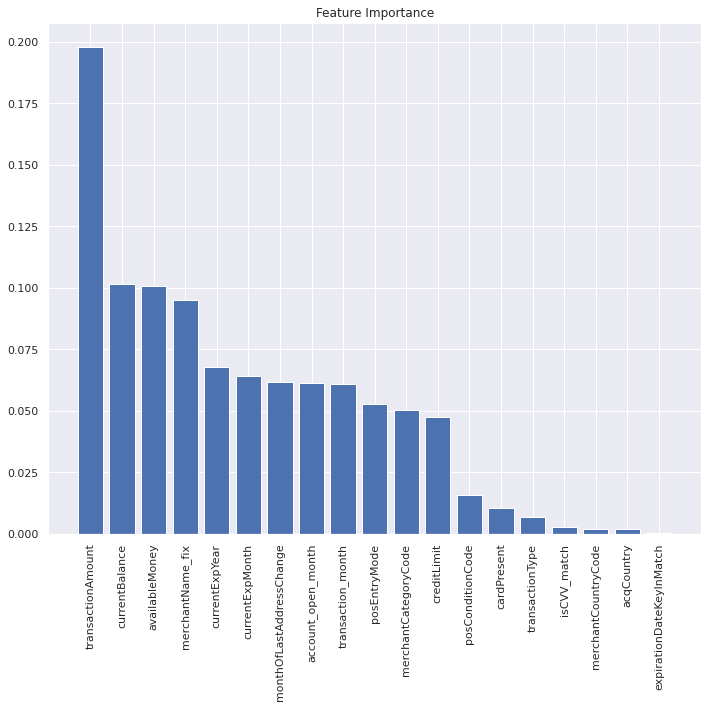

In [ ]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# 9. Computing AUROC and ROC curve values

**Prediction probabilities**

In [ ]:
LR_probs = model_lr.predict_proba(X_test)
RF_probs = model_rf.predict_proba(X_test)

In [ ]:
LR_probs = LR_probs[:, 1]
RF_probs = RF_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Calculate AUROC
LR_auc = roc_auc_score(Y_test, LR_probs)
RF_auc = roc_auc_score(Y_test, RF_probs)

print('Logistic Regression: AUROC = %.3f' % (LR_auc))
print('Random Forest: AUROC = %.3f' % (RF_auc))

Logistic Regression: AUROC = 0.682
Random Forest: AUROC = 0.764


In [ ]:
# Calculate ROC curve
LR_fpr, LR_tpr, _ = roc_curve(Y_test, LR_probs)
RF_fpr, RF_tpr, _ = roc_curve(Y_test, RF_probs)

In [ ]:
# Plot the ROC curve
import matplotlib.pyplot as plt

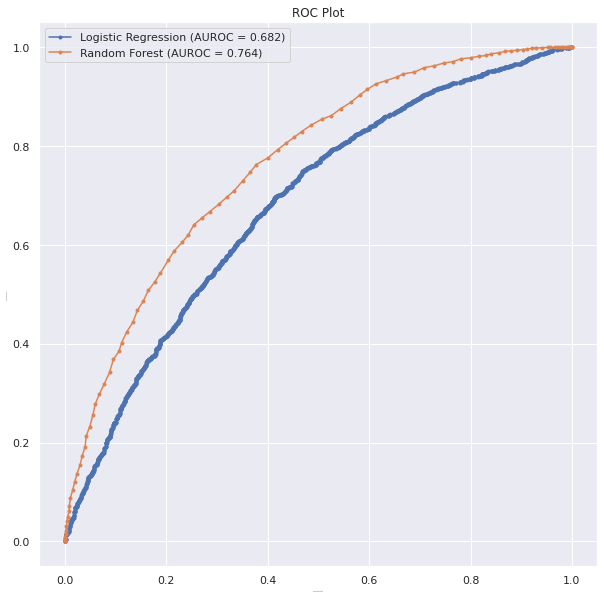

In [ ]:
plt.plot(LR_fpr, LR_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % LR_auc)
plt.plot(RF_fpr, RF_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % RF_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend()  
# Show plot
plt.show()